In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [7]:
def step(s,x,U,W):
    return x * U + s* W
def forward(x,U,W):
    number_of_samples = len(x)
    sequence_length = len(x[0])
    s = np.zeros((number_of_samples,sequence_length +1))
    for t in range(0,sequence_length):
        s[:,t+1] = step(s[:,t],x[:,t],U,W)
    return s

In [9]:
def backward(x,s,y,W):
    sequence_length = len(x[0])
    s_t = s[:,-1]
    gS = 2 * (s_t - y)
    gU, gW= 0, 0
    for k in range(sequence_length,0,-1):
        gU +=np.sum(gS * x[:,k -1])
        gW +=np.sum(gS * x[:,k-1])
        gS = gS *W
    return gU, gW

In [11]:
def train(x,y,epochs,learning_rate=0.0005):
    weights = (-2,0)
    losses = list()
    weights_u = list()
    weights_w = list()
    for i in range(epochs):
        s = forward(x,weights[0],weights[1])
        loss = (y[0]-s[-1,-1])**2
        losses.append(loss)
        weights_u.append(weights[0])
        weights_w.append(weights[1])
        gradients = backward(x,s,y,weights[1])
        weights = tuple((p- gp * learning_rate) for p, gp in zip(weights, gradients))
    print(weights)
    return np.array(losses), np.array(weights_u), np.array(weights_w)

(-2.0, 0.0)


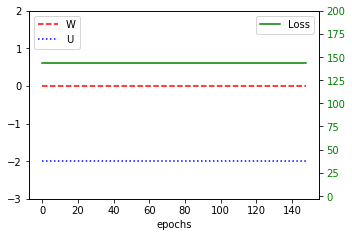

In [13]:
def plot_training(losses,weights_u,weights_w):
    losses = losses[~np.isnan(losses)][:-1]
    weights_u = weights_u[~np.isnan(weights_u)][:-1]
    weights_w = weights_w[~np.isnan(weights_w)][:-1]
    
    fig,ax1 = plt.subplots(figsize=(5,3.4))
    
    ax1.set_ylim(-3,2)
    ax1.set_xlabel('epochs')
    ax1.plot(weights_w,label='W',color='red',linestyle='--')
    ax1.plot(weights_u,label='U',color='blue',linestyle=':')
    ax1.legend(loc='upper left')
    
    
    ax2 = ax1.twinx()
    ax2.set_ylim(-3,200)
    ax2.plot(losses,label='Loss',color='green')
    ax2.tick_params(axis='y',labelcolor='green')
    ax2.legend(loc='upper right')
    
    fig.tight_layout()
    plt.show()
    
#x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
#y = np.array([3])
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([12])
losses,weight_u,weight_w = train(x,y,epochs=150)
plot_training(losses,weight_u,weight_w)

(-2.0, 0.0)


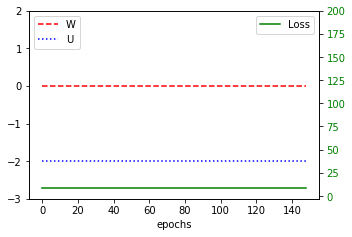

In [14]:
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])
losses,weight_u,weight_w = train(x,y,epochs=150)
plot_training(losses,weight_u,weight_w)